## Evaluation - Accuracy

In [1]:
import sklearn

print(sklearn.__version__)

1.0.2


In [2]:
import numpy as np
from sklearn.base import BaseEstimator

class MyDummyClassifier(BaseEstimator):
    def fit(self, X , y=None):
        pass
    
    # predict( ) predicts if Sex feature is 1, then it's 0. Otherwise, it's 1.  
    def predict(self, X):
        pred = np.zeros( ( X.shape[0], 1 ))
        for i in range (X.shape[0]) :
            if X['Sex'].iloc[i] == 1:
                pred[i] = 0
            else :
                pred[i] = 1
        
        return pred


In [3]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# deal with Null value - fillna() 
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

# drop unnecessary features 
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

# perform label encoding 
def format_features(df):
    df['Cabin'] = df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

# Call Data Preprocessing function
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)
X_train, X_test, y_train, y_test=train_test_split(X_titanic_df, y_titanic_df, \
                                                  test_size=0.2, random_state=0)
 
myclf = MyDummyClassifier()
myclf.fit(X_train ,y_train)

mypredictions = myclf.predict(X_test)
print('accuracy score of Dummy Classifier: {0:.4f}'.format(accuracy_score(y_test , mypredictions)))

accuracy score of Dummy Classifier: 0.7877


In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.base import BaseEstimator
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd

class MyFakeClassifier(BaseEstimator):
    def fit(self,X,y):
        pass
    
    
    def predict(self,X):
        return np.zeros( (len(X), 1) , dtype=bool)

# load MNIST data with load_digits( )
digits = load_digits()

print(digits.data)
print("### digits.data.shape:", digits.data.shape)
print(digits.target)
print("### digits.target.shape:", digits.target.shape)

[[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
### digits.data.shape: (1797, 64)
[0 1 2 ... 8 9 8]
### digits.target.shape: (1797,)


In [6]:
digits.target == 7

array([False, False, False, ..., False, False, False])

In [7]:
y = (digits.target == 7).astype(int)
X_train, X_test, y_train, y_test = train_test_split( digits.data, y, random_state=11)

In [11]:
# check the skewed label data distribution. 
print('shape of label test set :', y_test.shape)
print('value counts for test set label 0 and 1')
print(pd.Series(y_test).value_counts())

# Dummy Classifier
fakeclf = MyFakeClassifier()
fakeclf.fit(X_train , y_train)
fakepred = fakeclf.predict(X_test)
print('All prediction with 0:{:.3f}'.format(accuracy_score(y_test , fakepred)))

shape of label test set : (450,)
value counts for test set label 0 and 1
0    405
1     45
dtype: int64
All prediction with 0:0.900


## Confusion Matrix

In [12]:
from sklearn.metrics import confusion_matrix


confusion_matrix(y_test , fakepred)

array([[405,   0],
       [ 45,   0]])

## Precision & Recall

In [15]:
from sklearn.metrics import accuracy_score, precision_score , recall_score

print("Precision:", precision_score(y_test, fakepred))
print("Recall:", recall_score(y_test, fakepred))

Precision: 0.0
Recall: 0.0


/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**오차행렬, 정확도, 정밀도, 재현율을 한꺼번에 계산하는 함수 생성**

In [17]:
from sklearn.metrics import accuracy_score, precision_score , recall_score , confusion_matrix

def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    print('confusion matrix')
    print(confusion)
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}'.format(accuracy , precision ,recall))

In [18]:
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LogisticRegression
import warnings 
warnings.filterwarnings('ignore')

titanic_df = pd.read_csv('./titanic_train.csv')
y_titanic_df = titanic_df['Survived']
X_titanic_df= titanic_df.drop('Survived', axis=1)
X_titanic_df = transform_features(X_titanic_df)

X_train, X_test, y_train, y_test = train_test_split(X_titanic_df, y_titanic_df, \
                                                    test_size=0.20, random_state=11)

lr_clf = LogisticRegression(solver='liblinear')

lr_clf.fit(X_train , y_train)
pred = lr_clf.predict(X_test)
get_clf_eval(y_test , pred)

confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705


### Precision/Recall Trade-off

**predict_proba( ) method**

In [19]:
pred_proba = lr_clf.predict_proba(X_test)
pred  = lr_clf.predict(X_test)
print('pred_proba() Shape : {0}'.format(pred_proba.shape))
print('the first 3 rows pred_proba array \n:', pred_proba[:3])

pred_proba_result = np.concatenate([pred_proba , pred.reshape(-1,1)],axis=1)
print('predict the bigger rate among two classes \n',pred_proba_result[:3])


pred_proba() Shape : (179, 2)
the first 3 rows pred_proba array 
: [[0.44935227 0.55064773]
 [0.86335512 0.13664488]
 [0.86429645 0.13570355]]
predict the bigger rate among two classes 
 [[0.44935227 0.55064773 1.        ]
 [0.86335512 0.13664488 0.        ]
 [0.86429645 0.13570355 0.        ]]


**Binarizer**

In [20]:
from sklearn.preprocessing import Binarizer

X = [[ 1, -1,  2],
     [ 2,  0,  0],
     [ 0,  1.1, 1.2]]

# return 0 if x is smaller or equal than threshold. Otherwise return 1. 
binarizer = Binarizer(threshold=1.1)                     
print(binarizer.fit_transform(X))

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]]


**threshold = 0.5 by Binarizer**

In [22]:
from sklearn.preprocessing import Binarizer

custom_threshold = 0.5

pred_proba_1 = pred_proba[:,1].reshape(-1,1)

binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test, custom_predict)

confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705


**threshold = 0.4 by Binarizer**

In [23]:
# lower threshold 0.5 to 0.4.

custom_threshold = 0.4
pred_proba_1 = pred_proba[:,1].reshape(-1,1)
binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_1) 
custom_predict = binarizer.transform(pred_proba_1)

get_clf_eval(y_test , custom_predict)

confusion matrix
[[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197


**custom threshold with many values**

In [24]:
 thresholds = [0.4, 0.45, 0.50, 0.55, 0.60]

def get_eval_by_threshold(y_test , pred_proba_c1, thresholds):
   
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1) 
        custom_predict = binarizer.transform(pred_proba_c1)
        print('threshold:',custom_threshold)
        get_clf_eval(y_test , custom_predict)

get_eval_by_threshold(y_test ,pred_proba[:,1].reshape(-1,1), thresholds )

threshold: 0.4
confusion matrix
[[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197
threshold: 0.45
confusion matrix
[[105  13]
 [ 13  48]]
accuracy: 0.8547, precision: 0.7869, recall: 0.7869
threshold: 0.5
confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705
threshold: 0.55
confusion matrix
[[111   7]
 [ 16  45]]
accuracy: 0.8715, precision: 0.8654, recall: 0.7377
threshold: 0.6
confusion matrix
[[113   5]
 [ 17  44]]
accuracy: 0.8771, precision: 0.8980, recall: 0.7213


* extract precision-recall by precision_recall_curve( )

In [27]:
from sklearn.metrics import precision_recall_curve

# label = 1
pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 
 
precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_class1 )
print('returned threshold Shape:', thresholds.shape)
print('returned precisions Shape:', precisions.shape)
print('returned recalls Shape:', recalls.shape)

print('thresholds 5 sample:', thresholds[:5])
print('precisions 5 sample:', precisions[:5])
print('recalls 5 sample:', recalls[:5])

thr_index = np.arange(0, thresholds.shape[0], 15)
print('10 sample index:', thr_index)
print('10 sample threshold: ', np.round(thresholds[thr_index], 2))

# precision&recall by each threshold 
print('presicion by each threshold: ', np.round(precisions[thr_index], 3))
print('recall by each threshold: ', np.round(recalls[thr_index], 3))

returned threshold Shape: (147,)
returned precisions Shape: (148,)
returned recalls Shape: (148,)
thresholds 5 sample: [0.11573101 0.11636721 0.11819211 0.12102773 0.12349478]
precisions 5 sample: [0.37888199 0.375      0.37735849 0.37974684 0.38216561]
recalls 5 sample: [1.         0.98360656 0.98360656 0.98360656 0.98360656]
10 sample index: [  0  15  30  45  60  75  90 105 120 135]
10 sample threshold:  [0.12 0.13 0.15 0.17 0.26 0.38 0.49 0.63 0.76 0.9 ]
presicion by each threshold:  [0.379 0.424 0.455 0.519 0.618 0.676 0.797 0.93  0.964 1.   ]
recall by each threshold:  [1.    0.967 0.902 0.902 0.902 0.82  0.77  0.656 0.443 0.213]


**precision-recall curve by each threshold**

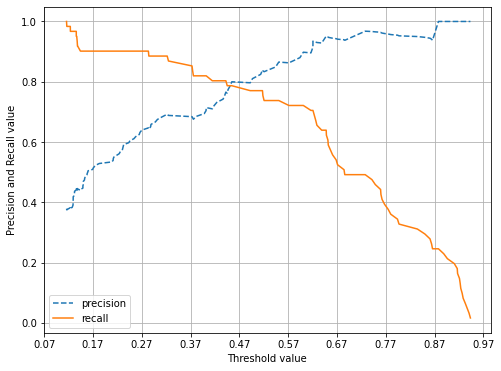

In [28]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
%matplotlib inline

def precision_recall_curve_plot(y_test , pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve( y_test, pred_proba_c1)
    
    plt.figure(figsize=(8,6))
    threshold_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[0:threshold_boundary], linestyle='--', label='precision')
    plt.plot(thresholds, recalls[0:threshold_boundary],label='recall')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))

    plt.xlabel('Threshold value'); plt.ylabel('Precision and Recall value')
    plt.legend(); plt.grid()
    plt.show()
    
precision_recall_curve_plot( y_test, lr_clf.predict_proba(X_test)[:, 1] )


### F1 Score

In [29]:
from sklearn.metrics import f1_score 
f1 = f1_score(y_test , pred)
print('F1 score: {0:.4f}'.format(f1))


F1 score: 0.7966


In [30]:
def get_clf_eval(y_test , pred):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
 
    f1 = f1_score(y_test,pred)
    print('confusion matrix')
    print(confusion)
    # f1 score print 추가
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f}, F1:{3:.4f}'.format(accuracy, precision, recall, f1))

thresholds = [0.4 , 0.45 , 0.50 , 0.55 , 0.60]
pred_proba = lr_clf.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:,1].reshape(-1,1), thresholds)


threshold: 0.4
confusion matrix
[[97 21]
 [11 50]]
accuracy: 0.8212, precision: 0.7042, recall: 0.8197, F1:0.7576
threshold: 0.45
confusion matrix
[[105  13]
 [ 13  48]]
accuracy: 0.8547, precision: 0.7869, recall: 0.7869, F1:0.7869
threshold: 0.5
confusion matrix
[[108  10]
 [ 14  47]]
accuracy: 0.8659, precision: 0.8246, recall: 0.7705, F1:0.7966
threshold: 0.55
confusion matrix
[[111   7]
 [ 16  45]]
accuracy: 0.8715, precision: 0.8654, recall: 0.7377, F1:0.7965
threshold: 0.6
confusion matrix
[[113   5]
 [ 17  44]]
accuracy: 0.8771, precision: 0.8980, recall: 0.7213, F1:0.8000


## ROC Curve-AUC

In [33]:
from sklearn.metrics import roc_curve

pred_proba_class1 = lr_clf.predict_proba(X_test)[:, 1] 

fprs , tprs , thresholds = roc_curve(y_test, pred_proba_class1)

thr_index = np.arange(1, thresholds.shape[0], 5)
print('sample index:', thr_index)
print('sample index threshold: ', np.round(thresholds[thr_index], 2))

#  FPR, TPR 
print('FPR: ', np.round(fprs[thr_index], 3))
print('TPR: ', np.round(tprs[thr_index], 3))


sample index: [ 1  6 11 16 21 26 31 36 41 46]
sample index threshold:  [0.94 0.73 0.62 0.52 0.44 0.28 0.15 0.14 0.13 0.12]
FPR:  [0.    0.008 0.025 0.076 0.127 0.254 0.576 0.61  0.746 0.847]
TPR:  [0.016 0.492 0.705 0.738 0.803 0.885 0.902 0.951 0.967 1.   ]


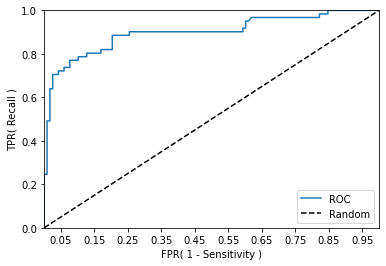

In [35]:
def roc_curve_plot(y_test , pred_proba_c1):

    fprs , tprs , thresholds = roc_curve(y_test ,pred_proba_c1)

    # ROC Curve
    plt.plot(fprs , tprs, label='ROC')
    
    # linear line
    plt.plot([0, 1], [0, 1], 'k--', label='Random')
    
    start, end = plt.xlim()
    plt.xticks(np.round(np.arange(start, end, 0.1),2))
    plt.xlim(0,1); plt.ylim(0,1)
    plt.xlabel('FPR( 1 - Sensitivity )'); plt.ylabel('TPR( Recall )')
    plt.legend()
    plt.show()
    
roc_curve_plot(y_test, lr_clf.predict_proba(X_test)[:, 1] )


In [36]:
from sklearn.metrics import roc_auc_score

pred_proba = lr_clf.predict_proba(X_test)[:, 1]
roc_score = roc_auc_score(y_test, pred_proba)
print('ROC AUC : {0:.4f}'.format(roc_score))


ROC AUC : 0.8987


In [39]:
def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('confusion matrix')
    print(confusion)
    # ROC-AUC print 추가
    print('accuracy: {0:.4f}, precision: {1:.4f}, recall: {2:.4f},\
          F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))
